In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings('ignore')

In [239]:
df = pd.read_csv('./DATA/wellbeing-statistics-2018-csv/wellbeing statistics 2018.csv')
df = df[df['Estimate'] != 'S']

In [240]:
with open('CaCodes.pickle', 'rb') as handle:
    CaCodes = pickle.load(handle)

In [241]:
with open('VaCodes_Std.pickle', 'rb') as handle:
    VaCodes = pickle.load(handle)

In [242]:
df['CaCode_Decoded'] = df['CACode'].apply(lambda x: CaCodes[x])

In [243]:
df['VaCode_Decoded'] = df['VaCode'].apply(lambda x: VaCodes[x])

In [244]:
df = df[(~df.VaCode_Decoded.str.contains("safety")) & (~df.VaCode_Decoded.str.contains("social")) & 
        (~df.VaCode_Decoded.str.contains("acceptance")) & 
        (~df.VaCode_Decoded.str.contains("security")) & 
       (~df.VaCode_Decoded.str.contains("express"))]

In [245]:
df.describe()

,ASE
count,4741.000000
mean,2.551888
std,2.311434
min,0.000000
25%,1.200000
50%,2.100000
75%,3.300000
max,16.800000


In [246]:
new_va = df["VaCode_Decoded"].str.split(":", n = 1, expand = True) 
df['VaCodeVariable'] = new_va[0]
df['VaCodeCategory'] = new_va[1]

In [247]:
new_ca = df["CaCode_Decoded"].str.split(":", n = 1, expand = True) 
df['CaCodeVariable'] = new_ca[0]
df['CaCodeCategory'] = new_ca[1]

In [248]:
df.drop(columns=['CACode', 'VaCode', 'ASE', 'Flag', 'CaCode_Decoded', 'VaCode_Decoded'], axis=1, inplace=True)

In [249]:
df['Estimate'] = pd.to_numeric(df['Estimate'])

In [250]:
df['CaCodeVariable'] = df['CaCodeVariable'].str.replace("none", "total")

In [251]:
df = df[df.VaCodeCategory != 'mean_rating'] #we dont need the mean_rating variables, because we can calculate it ourselves

In [252]:
df.head()

,Estimate,VaCodeVariable,VaCodeCategory,CaCodeVariable,CaCodeCategory
0,18.9,overall_life_satisfaction,0_to_6,total,variable_value_totals
1,19.0,overall_life_satisfaction,7,total,variable_value_totals
2,30.3,overall_life_satisfaction,8,total,variable_value_totals
3,14.9,overall_life_satisfaction,9,total,variable_value_totals
4,17.0,overall_life_satisfaction,10,total,variable_value_totals


In [253]:
rankings = {
    -1: ['crossvariable_value_totals_-_demographic_sub_totals'],
    0: ['0_to_6', '7', 'not_enough_money', 'fair/poor', 'most/all_of_the_time', '0_to_4'],
    1: ['8', 'only_just_enough_money', 'good', 'some_of_the_time', '5_to_6'],
    2: ['9', 'enough_money', 'very_good', 'a_little_of_the_time', '7_to_8'],
    3: ['10', 'more_than_enough_money','excellent', 'none_of_the_time', '9_to_10']
}

def get_key(x):
    for k,v in rankings.items():
        if x in v:
            return k

In [254]:
df['rankings'] = df['VaCodeCategory'].apply(lambda x: get_key(x))

In [255]:
df['rankings'] = pd.Categorical(df['rankings'])

In [256]:
df.head(10)

,Estimate,VaCodeVariable,VaCodeCategory,CaCodeVariable,CaCodeCategory,rankings
0,18.9,overall_life_satisfaction,0_to_6,total,variable_value_totals,0
1,19.0,overall_life_satisfaction,7,total,variable_value_totals,0
2,30.3,overall_life_satisfaction,8,total,variable_value_totals,1
3,14.9,overall_life_satisfaction,9,total,variable_value_totals,2
4,17.0,overall_life_satisfaction,10,total,variable_value_totals,3
6,14.0,life_worthwhile,0_to_6,total,variable_value_totals,0
7,16.7,life_worthwhile,7,total,variable_value_totals,0
8,28.2,life_worthwhile,8,total,variable_value_totals,1
9,17.7,life_worthwhile,9,total,variable_value_totals,2
10,23.3,life_worthwhile,10,total,variable_value_totals,3


In [257]:
df.to_pickle('wellbeing_df.pickle')

In [44]:
income_urban_rural = df[(df.VaCodeVariable == 'income_adequacy') & (df.CaCodeVariable == 'urban_/_rural')]

In [50]:
df['CaCodeVariable'].unique()

array(['total', 'lifestage', 'age_group', 'sex', 'labour_force_status',
       'highest_qualification', 'household_income', 'personal_income',
       'housing_tenure', 'family_type', 'migrant_status', 'ethnicity',
       'region', 'urban_/_rural', 'disability_status', 'sexual_identity'],
      dtype=object)

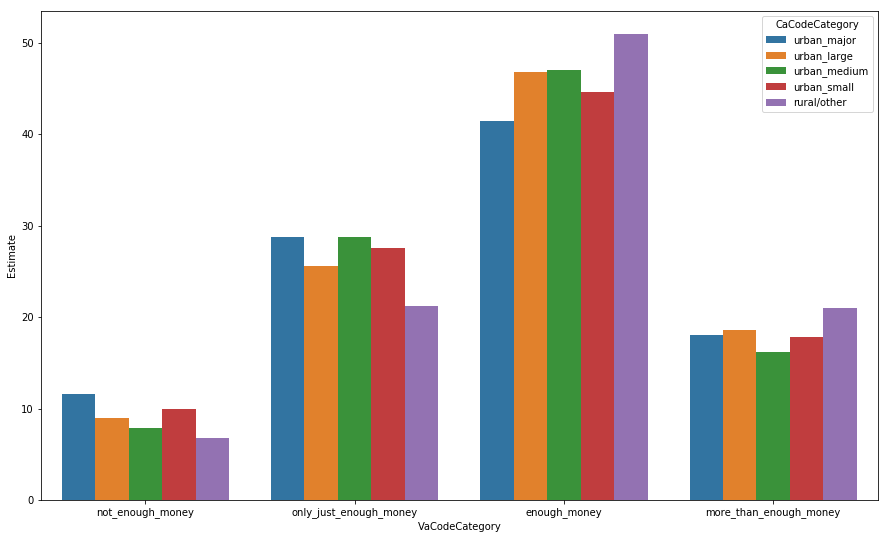

In [47]:
f, ax = plt.subplots(figsize=(15, 9))
sns.barplot(x='VaCodeCategory', y='Estimate', hue='CaCodeCategory', data=income_urban_rural)
plt.show()

In [51]:
life_satisfaction_identity = df[(df.VaCodeVariable == 'overall_life_satisfaction') & (df.CaCodeVariable == 'sexual_identity')]

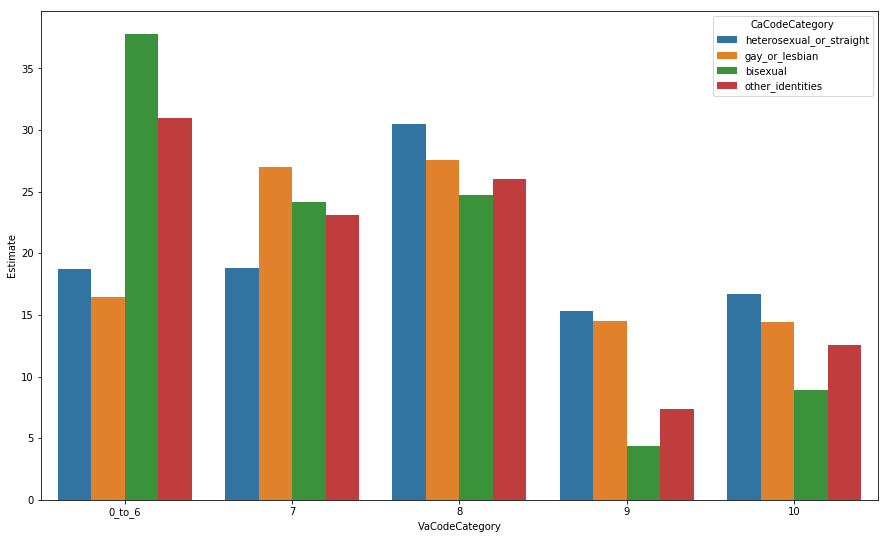

In [52]:
f, ax = plt.subplots(figsize=(15, 9))
sns.barplot(x='VaCodeCategory', y='Estimate', hue='CaCodeCategory', data=life_satisfaction_identity)
plt.show()

In [59]:
income_gender = df[(df.VaCodeVariable == 'income_adequacy') & (df.CaCodeVariable == 'sex')]

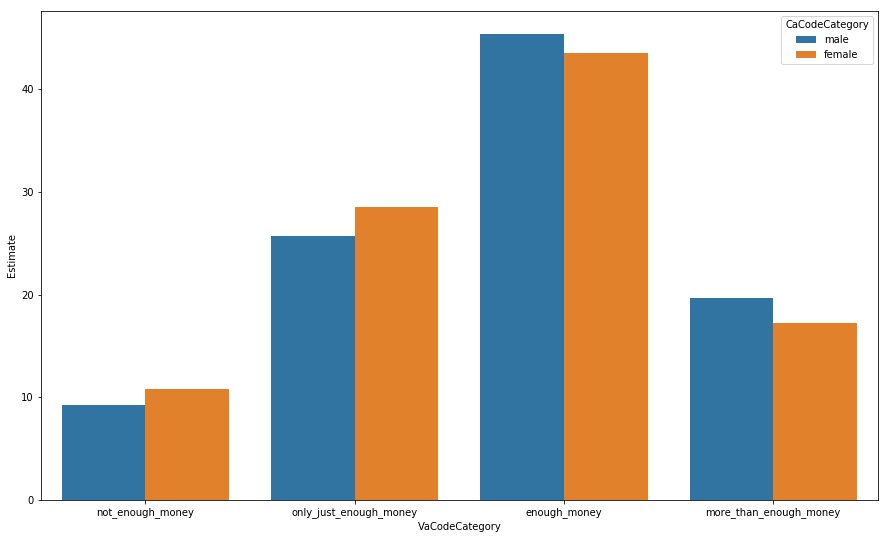

In [60]:
f, ax = plt.subplots(figsize=(15, 9))
sns.barplot(x='VaCodeCategory', y='Estimate', hue='CaCodeCategory', data=income_gender)
plt.show()

In [102]:
household_income = df[(df.CaCodeVariable == 'household_income')]

In [103]:
household_income['CaCodeCategory'] = df['CaCodeCategory'].astype(str).str.replace("_", "")

In [104]:
household_income['CaCodeCategory'].unique()

array(['$30,000orless', '$30,001–$70,000', '$70,001–$100,000',
       '$100,001–$150,000', '$150,001ormore'], dtype=object)

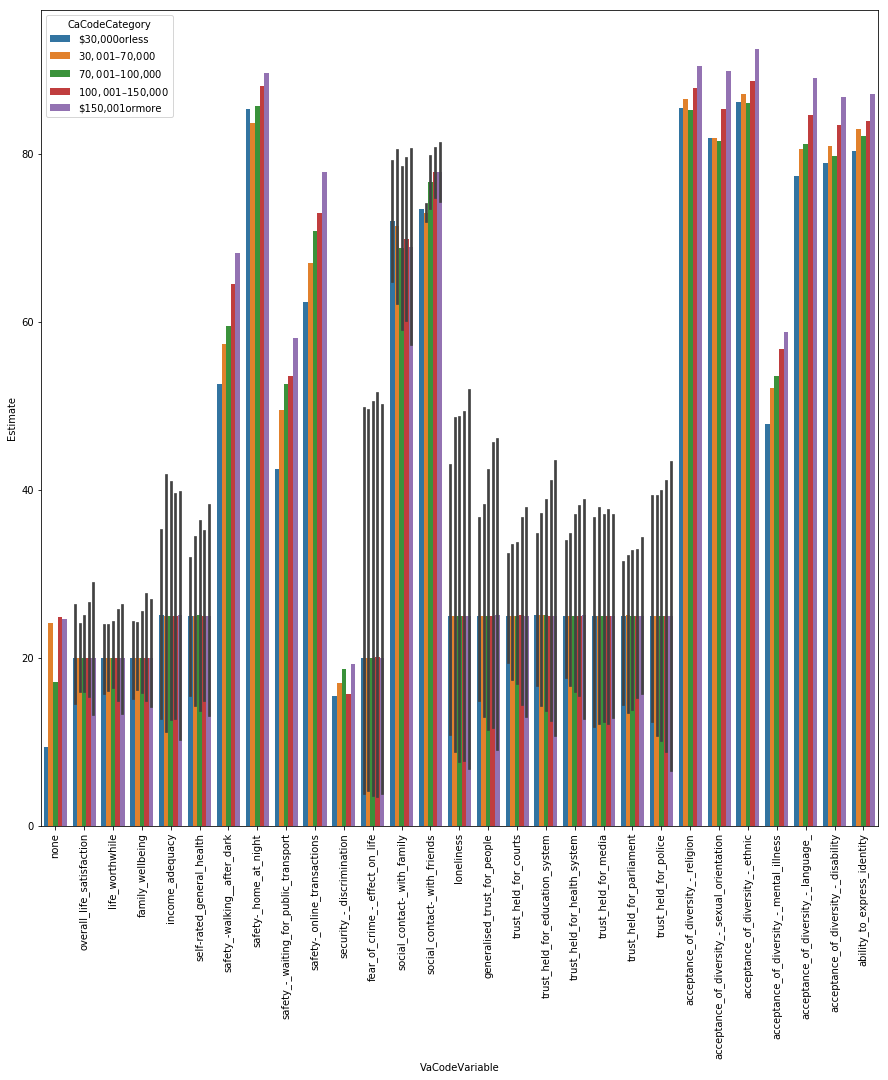

In [110]:
f, ax = plt.subplots(figsize=(15, 15))
sns.barplot(x='VaCodeVariable', y='Estimate', hue='CaCodeCategory', data=household_income)
plt.xticks(rotation=90)
plt.show()

In [122]:
df.head()

,Estimate,VaCodeVariable,VaCodeCategory,CaCodeVariable,CaCodeCategory
0,18.9,overall_life_satisfaction,0_to_6,total,variable_value_totals
1,19.0,overall_life_satisfaction,7,total,variable_value_totals
2,30.3,overall_life_satisfaction,8,total,variable_value_totals
3,14.9,overall_life_satisfaction,9,total,variable_value_totals
4,17.0,overall_life_satisfaction,10,total,variable_value_totals


In [153]:
household_income.CaCodeCategory.unique()

array(['$30,000orless', '$30,001–$70,000', '$70,001–$100,000',
       '$100,001–$150,000', '$150,001ormore'], dtype=object)

In [160]:
test = df.pivot_table('Estimate', ['CaCodeVariable', 'VaCodeVariable', 'CaCodeCategory'], 'VaCodeCategory')

In [162]:
df['VaCodeCategory'] = pd.Categorical(df['VaCodeCategory'])

In [164]:
df.VaCodeCategory.unique()

[0_to_6, 7, 8, 9, 10, ..., 7_to_8, 9_to_10, very_comfortable/comfortable, very_easy/easy, crossvariable_value_totals_-_demographic_sub_t...]
Length: 30
Categories (30, object): [0_to_6, 7, 8, 9, ..., 9_to_10, very_comfortable/comfortable, very_easy/easy, crossvariable_value_totals_-_demographic_sub_t...]